# Пошуковий аналіз даних

<h2>Мета</h2>

Ознайомитись з методами перевірки статистичних гіпотез. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати дані за допомогою візуалізацій
* Робити описовий аналіз
* Групувати дані для аналізу
* Знаходити зв'язок між ознаками
* Перевіряти гіпотези про значущість коефіцієнта кореляції та про вигляд закону розподілу
* Робити дисперсійний аналіз

Приблизний час виконання: **60** хвилин


# <h2>Зміст</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Завдання для тренування</h3>
<ul>
    <li><a href="#pattern_visualization">Дослідження ознак за допомогою візуалізацій</a></li>
    <li><a href="#discriptive_statistics">Описовий аналіз</a></li>
    <li><a href="#basic_grouping">Групування даних</a></li>
    <li><a href="#correlation_causation">Зв'язок між ознаками</a></li>
    <li><a href="#anova">Дисперсійний аналіз (ANOVA)</a></li>
</ul>

</div>

<hr>

<h2 id="import_data">Імпорт даних</h2>


Імпорт бібліотек:


In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#! mamba install seaborn=0.9.0-y

In [1]:
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Завантаження даних в датафрейм "df" (скористайтесь файлом "auto1.csv", який ви зберегли в попередній роботі):


In [ ]:
# Якщо використовуєте Google Colaboratory

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/auto1.csv" # коренева папка вашого диску
path = "/content/drive/My Drive/data/auto1.csv" # не коренева папка вашого диску

In [2]:
# Якщо використовуєте Jupyter Notebook

path = "clean_data2.csv"

In [ ]:
# Якщо забули зберегти дані, то скористайтесь цим файлом (This dataset was hosted on IBM Cloud object)

path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660


<a name="pattern_visualization"></a>
## <h2>Дослідження ознак за допомогою візуалізацій</h2>


Для інсталювання Seaborn використовуємо pip, Python package manager.


Імпортуємо пакети для візуалізації "Matplotlib" та "Seaborn". Не забуваємо про <code>%matplotlib inline</code> для друку графіків в Jupyter notebook.


In [ ]:
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>Як вибрати правильний метод візуалізації?</h4>
<p>Під час візуалізації окремих змінних важливо спочатку зрозуміти, з яким типом змінної ви маєте справу. Це допоможе нам знайти правильний метод візуалізації для цієї змінної.</p>


In [5]:
# переглянути типи даних для кожного стовпця
print(df.dtypes)

Country Name           object
Region                 object
GDP per capita        float64
Population            float64
CO2 emission          float64
Area                  float64
Population Density    float64
dtype: object


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання  #1:</h2>

<p>Який тип даних стовпця 'peak-rpm'? </p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python    
float64
```

</details>


Наприклад, можна обчислити кореляцію між змінними типу "int64" або "float64" за допомогою методу <code>corr()</code>:


In [7]:
df.corr(numeric_only=True)

,GDP per capita,Population,CO2 emission,Area,Population Density
GDP per capita,1.000000,-0.047759,0.089094,0.063861,0.243174
Population,-0.047759,1.000000,0.802232,0.453500,-0.028449
CO2 emission,0.089094,0.802232,1.000000,0.585512,-0.017476
Area,0.063861,0.453500,0.585512,1.000000,-0.064138
Population Density,0.243174,-0.028449,-0.017476,-0.064138,1.000000


Діагональні елементи завжди дорівнюють одиниці; детальніше розглянемо кореляцію Пірсона в кінці зошита.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #2: </h2>

<p>Знайдіть кореляцію між наступними ознаками: 'bore', 'stroke', 'compression-ratio' та 'horsepower'.</p>
<p>Підказка: якщо ви хочете вибрати ці стовпці, використовуйте наступний синтаксис: df[['bore','stroke','compression-ratio','horsepower']]</p>
</div>


In [8]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df[['Population', 'Area']].corr()

,Population,Area
Population,1.0000,0.4535
Area,0.4535,1.0000


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()
```

</details>


<h3>Кількісні змінні</h3>

<p>Неперервні числові змінні - це змінні, які можуть містити будь-яке значення в певному діапазоні. Вони можуть бути типу "int64" або "float64". Чудовим способом візуалізації цих змінних є використання діаграм розсіювання з підігнаними лініями.</p>

<p>Щоб почати розуміти (лінійний) зв’язок між окремою змінною та ціною, ми можемо використати <code>regplot()</code>, який будує діаграму розсіювання плюс підігнану лінію регресії для даних. Це також буде корисно пізніше для візуалізації відповідності моделі простої лінійної регресії. </p>


Давайте розглянемо кілька прикладів різних лінійних залежностей:


<h4>Позитивна лінійна залежність</h4>


Побудуємо діаграму розсіювання для 'engine-size' та 'price'.


(0.0, 10806782.23944748)

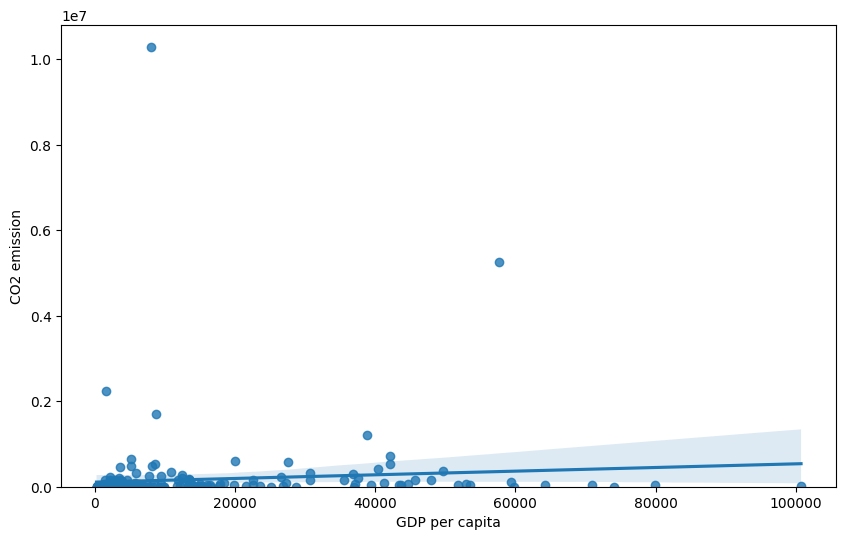

In [25]:
# Engine size як потенційний предиктор для price
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per capita', y='CO2 emission', data=df)
plt.ylim(0,)

<p>Зі збільшенням об’єму двигуна зростає і ціна: це вказує на позитивну пряму кореляцію між цими двома ознаками. Розмір двигуна здається досить хорошим предиктором ціни, оскільки лінія регресії є майже ідеальною діагональною лінією.</p>


In [ ]:
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


 Можемо перевірити кореляцію між 'engine-size' та 'price' і побачити, що вона приблизно 0.87.


In [23]:
df[['Population', 'CO2 emission']].corr()

,Population,CO2 emission
Population,1.000000,0.802232
CO2 emission,0.802232,1.000000


<h4>Негативна лінійна залежність</h4>


'City-mpg' потенційний предиктор ознаки 'price'. Побудуємо діаграму розсіювання для 'city-mpg' та 'price'.


<Axes: xlabel='Area', ylabel='Population Density'>

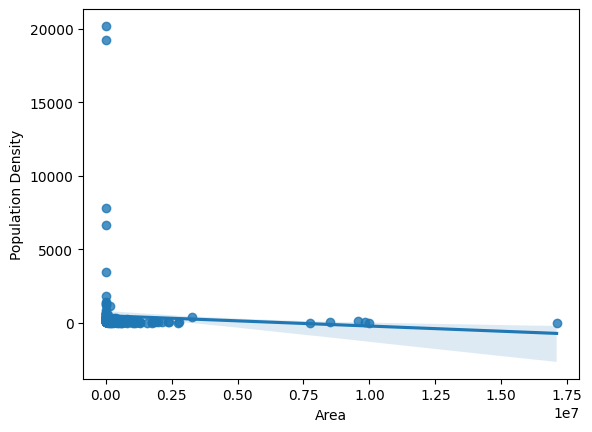

In [29]:
sns.regplot(x='Area', y='Population Density', data=df)

<p>У міру зростання 'city-mpg' ціна падає: це вказує на зворотний/негативний зв’язок між цими двома ознаками. 'City-mpg' потенційно може бути предиктором 'price'.</p>


Можемо перевірити кореляцію між 'city-mpg' та 'price' і побачити, що вона приблизно -0.687.


In [30]:
df[['Area', 'Population Density']].corr()

,Area,Population Density
Area,1.000000,-0.064138
Population Density,-0.064138,1.000000


<h4>Слабка лінійна залежність</h4>


Перевіримо, чи є 'peak-rpm' потенційним предиктором ознаки 'price'.


In [ ]:
sns.regplot(x='peak-rpm', y='price', data=df)

<p>Пікова кількість обертів на хвилину взагалі не здається хорошим предиктором ціни, оскільки лінія регресії близька до горизонтальної. Крім того, точки даних дуже розкидані та далекі від підігнаної лінії, демонструючи велику варіабельність. Тому це не релевантна змінна.</p>


Можемо перевірити кореляцію між 'peak-rpm' та 'price' і побачити, що вона приблизно -0.101616.


In [ ]:
df[['peak-rpm','price']].corr()

 <div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  3 a): </h2>

<p>Знайдіть кореляцію між x='stroke' та y='price'.</p>
<p>Підказка: якщо хочете вибрати ці стовпці, використовуйте наступний синтаксис: df[['stroke','price']].  </p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python

#Кореляція 0.0823, недіагональні елементи таблиці.

df[["stroke","price"]].corr()

```

</details>


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання  3 b):</h2>

<p>Враховуючи результати кореляції між 'price' та 'stroke', ви очікуєте лінійного зв'язку?</p>
<p>Перевірте свої результати за допомогою функції "regplot()".</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python

#Існує слабка кореляція між змінними 'stroke' і 'price'. Така регресія не працюватиме добре. Можемо побачити це за допомогою "regplot".

#Код:
sns.regplot(x="stroke", y="price", data=df)

```

</details>


<h3>Якісні змінні</h3>

<p>Якісні (категоріальні) змінні - це змінні, які описують «характеристику» одиниці даних і вибираються з невеликої групи категорій. Категоріальні змінні можуть мати тип "object" або "int64". Хорошим способом візуалізації категоріальних змінних є використання діаграм розмаху.</p>


Розглянемо зв'язок між 'body-style' та 'price'.


<Axes: xlabel='Region', ylabel='CO2 emission'>

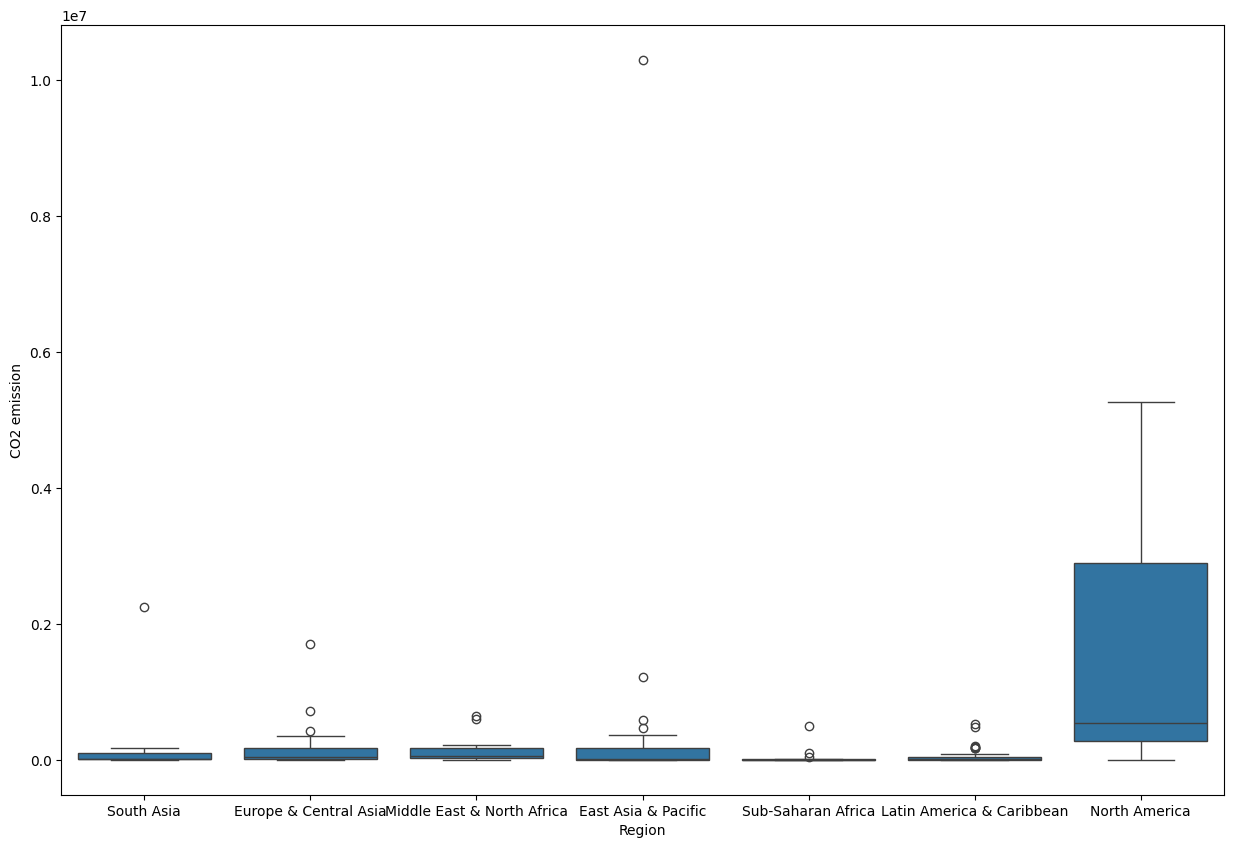

In [32]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Region', y='CO2 emission', data=df)

<p>Бачимо, що розподіл ціни між різними категоріями стилю кузова значно збігається, тому тип кузова не буде хорошим показником ціни. Розглянемо 'engine-location' та 'price':</p>


In [ ]:
sns.boxplot(x='engine-location', y='price', data=df)

<p>Тут бачимо, що розподіл ціни між цими двома категоріями розташування двигуна, передньою та задньою, є достатньо чітким, щоб вважати розташування двигуна потенційно хорошим предиктором ціни.</p>


 Розглянемо 'drive-wheels' та 'price'.


In [ ]:
sns.boxplot(x='drive-wheels', y='price', data=df)

<p>Тут бачимо, що розподіл ціни між різними категоріями приводних коліс відрізняється. Таким чином, тип приводу потенційно може бути предиктором ціни.</p>


<a name="discriptive_statistics"></a>
## <h2>Описовий аналіз</h2>


<p>Давайте спочатку подивимося на змінні, використовуючи метод опису.</p>

<p>Метод <b>describe</b>  автоматично обчислює основну статистику для всіх кількісних змінних. Будь-які значення NaN автоматично пропускаються в цій статистиці.</p>

Це покаже:
<ul>
    <li>кількість значень цієї змінної</li>
    <li>середнє значення</li>
    <li>стандартне відхилення (std)</li>
    <li>мінімальне значення</li>
    <li>міжквартильний розмах IQR (Interquartile Range: 25%, 50% та 75%)</li>
    <li>максимальне значення</li>
<ul>


 Можемо застосувати метод "describe" наступним чином:


In [37]:
df.describe(include='all')

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
count,217,217,217.000000,2.170000e+02,2.170000e+02,2.170000e+02,217.000000
unique,217,7,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN
freq,1,58,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13445.593416,3.432256e+07,1.651141e+05,6.188441e+05,435.008979
std,NaN,NaN,16873.922101,1.344477e+08,8.100511e+05,1.827830e+06,2012.796220
min,NaN,NaN,285.727442,1.109700e+04,1.100100e+01,2.000000e+00,0.136889
25%,NaN,NaN,2361.160205,7.956010e+05,1.954511e+03,1.088700e+04,36.064795
50%,NaN,NaN,7179.340661,6.293253e+06,1.156205e+04,9.303000e+04,92.731319
75%,NaN,NaN,14428.140260,2.369592e+07,8.256251e+04,4.474200e+05,225.085714


Налаштування за замовчуванням методу <code>describe()</code> таке, що він пропускає змінні типу "object". Ми можемо застосувати метод <code>describe()</code> до змінних типу "object" наступним чином:

In [ ]:
df.describe(include=['object'])

<h3>Підрахунок значень</h3>


<p>Підрахунок значень є хорошим способом зрозуміти, скільки одиниць кожної ознаки/змінної маємо. Можемо застосувати метод <code>value_counts()</code> до стовпця 'drive-wheels'. Не забувайте, що метод <code>value_counts()</code> працює лише на серіях pandas, а не на датафреймах, тому включаємо лише одну дужку<code>df['drive-wheels']</code>, а не дві <code>df[['drive-wheels']]</code>.</p>


In [39]:
df['Region'].value_counts()

Region
Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: count, dtype: int64

Можемо перетворити серію на датафрейм наступним чином:

In [40]:
df['Region'].value_counts().to_frame()

,count
Region,
Europe & Central Asia,58
Sub-Saharan Africa,48
Latin America & Caribbean,42
East Asia & Pacific,37
Middle East & North Africa,21
South Asia,8
North America,3


Давайте повторимо наведені вище кроки, але збережемо результати у датафреймі "drive_wheels_counts" і перейменуємо стовпець 'drive-wheels' на 'value_counts'.


In [41]:
region_counts = df['Region'].value_counts().to_frame()
region_counts.rename(columns={'Region': 'value_counts'}, inplace=True)
region_counts

,count
Region,
Europe & Central Asia,58
Sub-Saharan Africa,48
Latin America & Caribbean,42
East Asia & Pacific,37
Middle East & North Africa,21
South Asia,8
North America,3


Тепер перейменуємо індекс на 'drive-wheels':

In [43]:
region_counts.index.name = 'Region'
region_counts

,count
Region,
Europe & Central Asia,58
Sub-Saharan Africa,48
Latin America & Caribbean,42
East Asia & Pacific,37
Middle East & North Africa,21
South Asia,8
North America,3


Можемо повторити описаний вище процес для ознаки 'engine-location'.


In [44]:
# engine-location as variable
engine_loc_counts = df['Country Name'].value_counts().to_frame()
engine_loc_counts.rename(columns={'Country Name': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'country-name'
engine_loc_counts.head(10)

,count
country-name,
Afghanistan,1
Palau,1
Nepal,1
Netherlands,1
New Caledonia,1
New Zealand,1
Nicaragua,1
Niger,1
Nigeria,1


<p>Переглянувши кількість значень розташування двигуна бачимо, що розташування двигуна не буде гарним предиктором для ціни. Це пов’язано з тим, що у нас є лише три машини із заднім двигуном і 198 з двигуном спереду, тому цей результат спотворений (зсунутий). Таким чином, ми не можемо зробити жодних висновків спираючись на розташування двигуна.</p>

<a name="basic_grouping"></a>
## <h2>Групування даних</h2>


<p>Метод <code>groupby()</code> групує дані за різними категоріями. Дані групуються на основі однієї або кількох змінних, а аналіз виконується на окремих групах.</p>

<p>Для прикладу згрупуємо за змінною 'drive-wheels'. Бачимо, що є 3 різні категорії ведучих коліс.</p>


In [48]:
df['Region'].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

<p>Якщо хочемо знати в середньому, який тип ведучого колеса є найдорожчим, можемо згрупувати 'drive-wheels', а потім усереднити їх ціну по групам.</p>

<p>Оберемо стовпчики 'drive-wheels', 'body-style' та 'price' і запишемо їх в змінну "df_group_one".</p>


In [54]:
df_group_one = df[['Region','GDP per capita','CO2 emission']]

Потім можемо розрахувати середню ціну для кожної з різних категорій даних.


In [55]:
# grouping results
df_group_one = df_group_one.groupby(['Region'],as_index=False).mean()
df_group_one

,Region,GDP per capita,CO2 emission
0,East Asia & Pacific,15130.226548,3.918692e+05
1,Europe & Central Asia,22742.135518,1.217805e+05
2,Latin America & Caribbean,10485.343136,5.682480e+04
3,Middle East & North Africa,15459.162533,1.312287e+05
4,North America,37755.682535,1.930683e+06
5,South Asia,2795.213935,3.145543e+05
6,Sub-Saharan Africa,2878.665521,1.700846e+04


<p>За нашими даними, здається, що задньопривідні автомобілі в середньому є найдорожчими, тоді як повнопривідні та передньопривідні приблизно однакові за ціною.</p>

<p>Можна також групувати за кількома змінними. Наприклад, згрупуємо за 'drive-wheels' та 'body-style'. Таке групування робиться за унікальною комбінацією 'drive-wheels' та 'body-style'. Можемо зберігати результати в змінній "grouped_test1".</p>


In [ ]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

<p>Ці згруповані дані набагато легше візуалізувати, якщо їх перетворити у зведену таблицю. Зведена таблиця схожа на електронну таблицю Excel з однією змінною вздовж стовпця та іншою вздовж рядка. Ми можемо перетворити фрейм даних на зведену таблицю за допомогою методу <code>pivot()</code>, щоб створити зведену таблицю з груп.</p>

<p>Залишимо змінну 'drive-wheels' як рядки таблиці, а 'body-style' перетворимо на стовпці таблиці:</p>


In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

<p>Часто ми не матимемо даних для деяких зведених клітинок. Можемо заповнити ці відсутні клітинки значенням 0, але потенційно можна використати будь-яке інше значення. </p>


In [ ]:
grouped_pivot = grouped_pivot.fillna(0)   # заповнення відсутніх значень 0
grouped_pivot

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2>Завдання 4:</h2>

<p>Використайте функцію "groupby", щоб знайти середню ціну 'price' кожного автомобіля на основі типу кузова 'body-style'.</p>
</div>


In [ ]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

```

</details>


Якщо ви не імпортували "pyplot", зробіть це зараз.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<h4>Змінні: Drive Wheels та Body Style vs. Price</h4>


Давайте використаємо теплову карту, щоб візуалізувати зв’язок між Body Style vs Price.


In [ ]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>На тепловій карті цільова змінна ціна ('price') пропорційно зафарбована відносно змінних 'drive-wheel' і 'body-style' на вертикальній і горизонтальній осях відповідно. Це дозволяє нам візуалізувати, як ціна пов’язана з 'drive-wheel' і 'body-style'.</p>

<p>Мітки за замовчуванням не передають нам жодної корисної інформації. Давайте змінимо це:</p>


In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Основне питання, на яке ми хочемо відповісти в цьому модулі: «Які основні ознаки найбільше впливають на ціну автомобіля?».</p>

<p>Щоб отримати кращу оцінку важливих ознак, подивимося на кореляцію цих змінних із ціною автомобіля. Іншими словами: як ціна автомобіля залежить від цієї змінної?</p>


<a name="correlation_causation"></a>
## <h2>Кореляція та причинно-наслідковий зв’язок</h2>


<p><b>Кореляція</b>: міра ступеня взаємозалежності між змінними.</p>

<p><b>Причинно-наслідковий зв’язок</b>: зв'язок між причиною та наслідком між двома змінними.</p>

<p>Важливо знати різницю між цими двома термінами. Кореляція не передбачає причинного зв’язку. Визначити кореляцію набагато простіше, ніж визначити причинно-наслідковий зв’язок, оскільки причинно-наслідковий зв’язок може потребувати незалежного експериментування.</p>


<p><b>Кореляція Пірсона</b></p>
<p>Кореляція Пірсона вимірює лінійну залежність між двома змінними X і Y.</p>
<p>Отриманий коефіцієнт має значення від -1 до 1 включно, де:</p>
<ul>
    <li><b>1</b>: ідеальна позитивна лінійна кореляція.</li>
    <li><b>0</b>: немає лінійної кореляції, дві змінні, швидше за все, не впливають одна на одну.</li>
    <li><b>-1</b>: ідеальна негативна лінійна кореляція.</li>
</ul>


<p>Кореляція Пірсона є методом за замовчуванням функції <code>corr()</code>. Як вже бачили раніше, можемо обчислити кореляцію Пірсона для змінних "int64" або "float64".</p>


In [ ]:
df.corr()

Іноді нам хотілося б знати значимість оцінки кореляції.


<b>Рівень значущості (P-value)</b>
<p>Що таке P-value? P-value це значення ймовірності того, що кореляція між двома змінними є статистично значущою. Зазвичай  обираємо рівень значущості 0,05, що означає, що ми на 95% впевнені, що кореляція між змінними є значущою.</p>

Згідно з умовами, коли
<ul>
    <li>p-value $<$ 0.001: ми кажемо, що є вагомі докази того, що кореляція є значною.</li>
    <li>the p-value $<$ 0.05: є помірні докази того, що кореляція є значною.</li>
    <li>the p-value $<$ 0.1: є слабкі докази того, що кореляція є значною.</li>
    <li>the p-value $>$ 0.1: немає доказів того, що кореляція є значною.</li>
</ul>


 Ми можемо отримати цю інформацію за допомогою модуля "stats" у бібліотеці "scipy".


In [ ]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Обчислимо коефіцієнт кореляції Пірсона та P-value 'wheel-base' і 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

<h4>Висновок:</h4>
<p>Оскільки p-value $<$ 0.001, кореляція між 'wheel-base' та 'price' є статистично значущою, хоча лінійна залежність не дуже сильна (~0.585).</p>


<h3>Horsepower vs. Price</h3>


 Обчислимо коефіцієнт кореляції Пірсона та P-value 'horsepower' і 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

<h4>Висновок:</h4>

<p>Оскільки p-value $<$ 0.001, кореляція між  'horsepower' та 'price' є статистично значущою, а лінійний зв’язок досить сильний (~0.809, близкий до 1).</p>


<h3>Length vs. Price</h3>

Обчислимо коефіцієнт кореляції Пірсона та P-value 'length' і 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

<h4>Висновок:</h4>
<p>Оскільки p-value $<$ 0.001, кореляція між 'length' та 'price' є статистично значущою, а лінійний зв’язок є помірно сильним (~0.691).</p>


<h3>Width vs. Price</h3>


 Обчислимо коефіцієнт кореляції Пірсона та P-value 'width' і 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

<h4>Висновок:</h4>

Оскільки p-value < 0.001, кореляція між 'width' та 'price' є статистично значущою, а лінійний зв'язок досить сильний (~0.751).


<h3>Curb-Weight vs. Price</h3>


 Обчислимо коефіцієнт кореляції Пірсона та P-value 'curb-weight' і 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

<h4>Висновок:</h4>
<p>Оскільки p-value $<$ 0.001, кореляція між 'curb-weight' та 'price' є статистично значущою, а лінійний зв'язок досить сильний (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Обчислимо коефіцієнт кореляції Пірсона та P-value 'engine-size' і 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

<h4>Висновок:</h4>

<p>Оскільки p-value $<$ 0.001, кореляція між 'engine-size' та 'price' є статистично значущою, а лінійний зв'язок дуже сильний (~0.872).</p>


<h3>Bore vs. Price</h3>


 Обчислимо коефіцієнт кореляції Пірсона та P-value 'bore' і 'price':


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

<h4>Висновок:</h4>
<p>Оскільки p-value $<$ 0.001,  кореляція між 'bore' та 'price' є статистично значущою, але лінійна залежність лише помірна (~0.521).</p>


 Продовжимо процес для 'city-mpg'  та 'highway-mpg':


<h3>City-mpg vs. Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

<h4>Висновок:</h4>
<p>Оскільки p-value $<$ 0.001, кореляція між 'city-mpg' та 'price' є статистично значущою, а коефіцієнт близько -0.687 показує, що зв'язок негативний і помірно сильний.</p>


<h3>Highway-mpg vs. Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

<h4>Висновок:</h4>
Оскільки p-value < 0.001, кореляція між 'highway-mpg' та 'price' є статистично значущою, а коефіцієнт близько -0.705 показує, що зв'язок негативний і помірно сильний.


<a name="anova"></a>
## <h2>Дисперсійний аналіз (ANOVA)</h2>


<p>Дисперсійний аналіз  (ANOVA) це статистичний метод, який використовується для перевірки наявності суттєвих відмінностей між середніми значеннями двох або більше груп. ANOVA повертає два параметри:</p>

<p><b>F-test score</b>: ANOVA припускає, що середні значення для всіх груп однакові, обчислює, наскільки фактичні середні відхиляються від припущення, і повідомляє це як результат F-тесту. Більше значення F-статистики означає більшу різницю між середніми значеннями.</p>

<p><b>P-value</b>:  показує, наскільки статистично значущим є обчислене значення F-статистики.</p>

<p>Якщо змінна 'price' сильно корелює зі змінною, яку ми аналізуємо, то очікуємо, що ANOVA поверне досить велике значення F-статистики та невелике p-value. </p>


<h3>Drive Wheels</h3>


<p>Оскільки ANOVA аналізує різницю між різними групами однієї змінної, стане в нагоді функція <code>groupby()</code>. Оскільки алгоритм дисперсійного аналізу автоматично усереднює дані, нам не потрібно брати середнє значення заздалегідь.</p>

<p>Згрупуємо дані, щоб побачити чи впливають різні типи 'drive-wheels' на 'price'.</p>


In [ ]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

 Можемо отримати значення групи за допомогою методу <code>get_group()</code>.  


In [ ]:
grouped_test2.get_group('4wd')['price']

У випадку параметричного дисперсійного аналізу (ANOVA) можемо скористатись функцією 'f_oneway' з модуля 'stats' для отримання <b>F-test score</b> та <b>P-value</b>.


In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

Але такий варіант дисперсійного аналізу дасть коректний результат, коли дані мають нормальний розподіл в групах. Перевіримо, чи нормально розподілені дані в кожній з груп, скористаємось функцією 'shapiro' з модуля 'stats'.  

In [ ]:
print("група 'fwd'", stats.shapiro(grouped_test2.get_group('fwd')['price']))
print("група 'rwd'", stats.shapiro(grouped_test2.get_group('rwd')['price']))
print("група '4wd'", stats.shapiro(grouped_test2.get_group('4wd')['price']))


P-value майже 0 в двох групах і не перевищує рівня значущості 0.05 в третій, отже в усіх групах дані мають  розподіл що відрізняється від нормального. Тому для дисперсійного аналізу скористаємось непараметричним аналогом ANOVA - тестом Краскела-Уоліса.

In [ ]:
# Conduct the Kruskal-Wallis Test (non-parametric ANOVA)
result = stats.kruskal(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print(result)

Це чудовий результат із високим показником тесту і P-value майже 0, що передбачає впевнену статистичну значущість. Але чи означає це, що всі три досліджувані групи сильно відрізняються між собою?

Розглянемо їх окремо.

<h4>fwd and rwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val )

 Розглянемо інші групи.


<h4>4wd and rwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

<h4>4wd and fwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])

print("ANOVA results: F=", f_val, ", P =", p_val)

Ми помітили, що дисперсійний аналіз для категорій "4wd" і "fwd" дає високий p-value > 0.1, тому розрахований показник F-тесту не є статистично значущим. Це говорить про те, що ми не можемо відкинути припущення, що середні значення цих двох груп однакові, або, іншими словами, ми не можемо зробити висновок про значущість різниці.

<h3>Висновок: важливі ознаки</h3>


<p>Тепер ми маємо краще уявлення про те, як виглядають наші дані та які ознаки важливо враховувати під час прогнозування ціни автомобіля. Ми звузили датасет до таких змінних:</p>

Кількісні змінні:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Якісні змінні:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>В наступній роботі перейдемо до створення моделей машинного навчання для автоматизації аналізу, в модель включатимо лише ті ознаки, які суттєво впливають на цільову змінну, що покращить ефективність прогнозування моделі.</p>


*В теоретичній частині роботи використано елементи курсу "Data Analysis with Python" від IBM Corporation, автор
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">Joseph Santarcangelo</a>*